In [1]:
import jax
import jax.numpy as np
import jax.random as rnd

## PARAMS

In [8]:
key = rnd.PRNGKey(0)
out_dim = 3
in_dim  = 20
N = 300

mean_coef = 1
var_coef  = 1 

In [9]:
key, _ = rnd.split(key)
mean = rnd.normal(key, shape=(in_dim,))
print(mean[0])  # -0.69622177

-0.69622177


In [10]:
key, _ = rnd.split(key)
var = rnd.normal(key, shape=(N, in_dim))
print(var[0,0]) # -1.6442325
X = mean * mean_coef + var * var_coef

-1.6442325


In [11]:
key, _ = rnd.split(key)
Y = rnd.normal(key, shape=(out_dim,))
print(Y[0]) # -0.5666933

-0.5666933


## MODEL

In [12]:
key, _ = rnd.split(key)
W = rnd.normal(key, shape=(in_dim, out_dim))
pred = lambda w,x: x.dot(w)
print(W[0,0]) # -2.2194185

-2.2194185


## HELPERS

In [13]:
from jax import jit, jacfwd, jacrev

def hessian(fun):
    return jit(jacfwd(jacrev(fun)))

loss = lambda o,y: ((o-y)**2).mean()
predloss = lambda w,x,y: loss(pred(w,x),y)
H = hessian(predloss)

In [14]:
h = H(W,X,Y)
h = h.transpose((1,0,3,2)).reshape((60,60))
s,u = np.linalg.eig(h)
s = s.astype("float32")
u = u.astype("float32")

/Users/tristan/anaconda3/envs/lab/lib/python3.7/site-packages/jax/lax/lax.py:342: ComplexWarning: Casting complex values to real discards the imaginary part
  warnings.warn(msg, onp.ComplexWarning)


In [15]:
import matplotlib.pyplot as plt

(array([57.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 0.4097691,  1.6805552,  2.9513412,  4.2221274,  5.4929132,
         6.7636995,  8.034486 ,  9.305272 , 10.576057 , 11.846844 ,
        13.11763  ], dtype=float32),
 <a list of 10 Patch objects>)

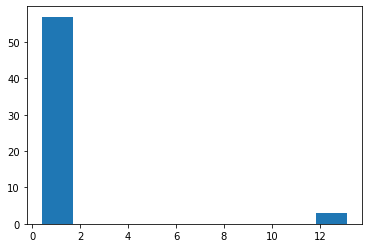

In [16]:
plt.hist(s)

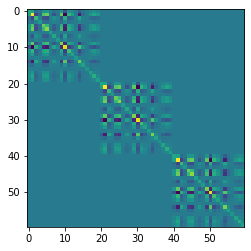

In [17]:
plt.imshow(h)